<a href="https://colab.research.google.com/github/nlei1/nlp-notebooks/blob/main/alsentzer_Bio_ClinicalBERT_pca_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install transformers datasets

     |████████████████████████████████| 3.4 MB 5.3 MB/s 
     |████████████████████████████████| 306 kB 52.4 MB/s 
     |████████████████████████████████| 596 kB 70.2 MB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
     |████████████████████████████████| 3.3 MB 34.9 MB/s 
     |████████████████████████████████| 895 kB 52.4 MB/s 
     |████████████████████████████████| 243 kB 49.4 MB/s 
     |████████████████████████████████| 133 kB 73.0 MB/s 
     |████████████████████████████████| 1.1 MB 68.8 MB/s 
     |████████████████████████████████| 271 kB 46.6 MB/s 
     |████████████████████████████████| 160 kB 60.5 MB/s 
     |████████████████████████████████| 192 kB 54.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import numpy as np, pandas as pd 
import os
import zipfile
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at emilyalsentzer/Bio_ClinicalBERT were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
url = 'https://raw.githubusercontent.com/nlei1/csvs-for-proj/main/noi.csv'
drugs = pd.read_csv(url, error_bad_lines=False)

In [4]:
drugs

,names
0,Zolpidem
1,Eszopiclone
2,Zaleplon
3,Trazodone
4,Amitriptyline
5,Mirtazapine
6,Doxepin
7,Lorazepam
8,Clonazepam
9,Temazepam


In [5]:
from sklearn.metrics.pairwise import cosine_similarity
def embed_text(text, model):
    input_ids = torch.tensor(tokenizer.encode(text)).unsqueeze(0)  # Batch size 1
    outputs = model(input_ids)
    last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple
    return last_hidden_states 

def get_embeddings(to_embed):
  embeddings = []
  for item in to_embed:
    t = embed_text(item, model)
    embeddings.append(np.array(t.detach().numpy().tolist()[0][0]))
  return embeddings

embeddings = get_embeddings(drugs['names'])

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
sns.set_style("darkgrid")

def get_pca(embeddings):
  pca = PCA(n_components=2)
  pca_result = pca.fit_transform(embeddings)
  post_pca = pd.DataFrame(pca_result, columns = ['x','y'])
  return post_pca

def get_tsne(embeddings, p_perplexity=1, p_n_iter=1500):
  tsne = TSNE(n_components=2, perplexity=p_perplexity, n_iter=p_n_iter)
  tsne_result = tsne.fit_transform(embeddings)
  post_tsne = pd.DataFrame(tsne_result, columns = ['x','y'])
  return post_tsne

0     Text(-1.4361165907547697, 0.09715353709849721,...
1     Text(-0.3621922042602462, 0.8391038583673377, ...
2     Text(0.6063120336096539, -1.9562928881131423, ...
3     Text(-1.4068057043508209, 0.19726768477464818,...
4     Text(-1.5613998991995095, 1.0938071605815562, ...
5     Text(-2.2656168473274083, 1.8116447672341531, ...
6     Text(2.6573666259819126, -0.84829967076071, 'D...
7     Text(-0.9362340287821401, -1.3347853232267544,...
8     Text(-0.6562511217969249, -1.8610323996230225,...
9     Text(-1.8580767697673206, -0.7371574111263877,...
10    Text(-0.33612871508158565, -1.6258556900198309...
11    Text(4.770537953086417, 1.8593661602963332, 'R...
12    Text(3.7598564315857224, -0.18575796273033524,...
13    Text(-0.9752511629429793, 2.650838177247658, '...
dtype: object

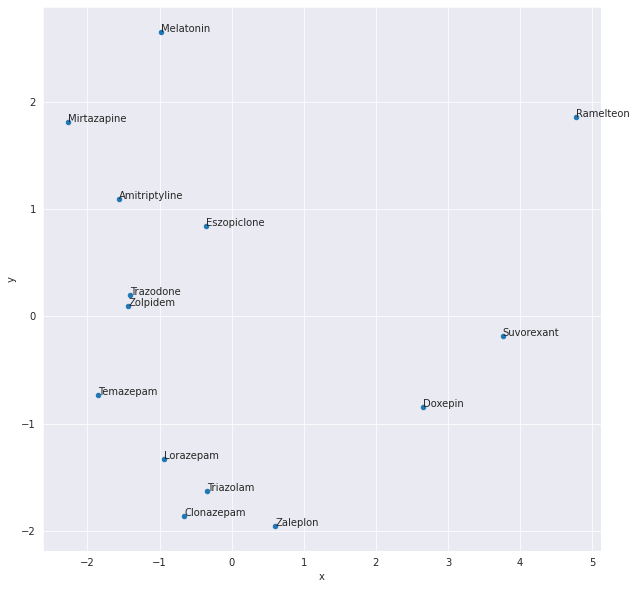

In [7]:
post_pca = get_pca(embeddings)
post_pca_annotated = post_pca.join(pd.DataFrame(drugs, columns=['names']))
ax = post_pca_annotated.plot(x='x',y='y',kind='scatter',figsize=(10,10))
post_pca_annotated[['x','y','names']].apply(lambda x: ax.text(*x),axis=1)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


0     Text(33.59992980957031, -18.26067543029785, 'Z...
1     Text(-2.600512981414795, -13.850093841552734, ...
2     Text(50.133480072021484, -15.222949981689453, ...
3     Text(-14.081747055053711, -27.215131759643555,...
4     Text(-20.48664665222168, -47.16143035888672, '...
5     Text(-31.835655212402344, -24.851409912109375,...
6     Text(65.71852111816406, -12.34396743774414, 'D...
7     Text(-67.02702331542969, -64.85619354248047, '...
8     Text(-69.41561126708984, -54.373504638671875, ...
9     Text(-24.314054489135742, 0.06399219483137131,...
10    Text(-83.03327941894531, -44.35792541503906, '...
11    Text(481.43310546875, 471.39227294921875, 'Ram...
12    Text(474.1839904785156, 478.7887268066406, 'Su...
13    Text(2.0312201976776123, -39.0047492980957, 'M...
dtype: object

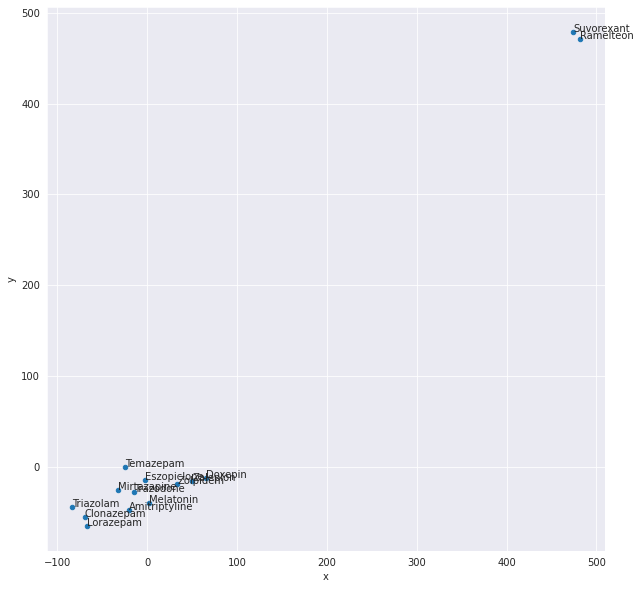

In [8]:
post_tsne = get_tsne(embeddings, p_perplexity=1, p_n_iter=1600)
post_tsne_annotated = post_tsne.join(pd.DataFrame(drugs, columns=['names']))
ax = post_tsne_annotated.plot(x='x',y='y',kind='scatter',figsize=(10,10))
post_tsne_annotated[['x','y','names']].apply(lambda x: ax.text(*x),axis=1)